# 8.2 Mathematical tools for image formation. Homogeneous transformations


Homogeneous (also called projective) transformations are linear transformations (i.e. matrix multiplications) **between homogeneous coordinates** (vectors). Such coordinates are obtained from Cartesian (inhomogeneous) vectors by **extending them with a non-negative number** (typically 1, for convenience).

Although we are going to explain homogeneous transformations using the 3D space, **this is generalizable to any other number of dimensions**.

A 3D vector (or a 3D point) in **inhomogeneous coordinates** looks like:

$$\mathbf{x} = \begin{bmatrix} x \\ y \\ z \end{bmatrix} \in \mathbb{R}^3$$

while the same vector in **homogeneous coordinates** has the form (note the tilde in the notation):

$$\mathbf{\tilde{x}} = \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix} \equiv \begin{bmatrix} \lambda x \\ \lambda y \\ \lambda z \\ \lambda \end{bmatrix} \in \mathbb{R}^4$$

We can go back by dividing the three first coordinates by the fourth:$\\[5pt]$

$$\mathbf{\tilde{x}} = \begin{bmatrix} \lambda x \\ \lambda y \\ \lambda z \\ \lambda \end{bmatrix} \Rightarrow \mathbf{x} = \begin{bmatrix} x/\lambda \\ y/\lambda \\ z/\lambda \end{bmatrix} \in \mathbb{R}^3$$

This way, the family of homogeneous vectors with $\lambda \neq 0$ represents the same point in $\mathbb{R}^3$, since $\lambda$ doesn't affect. Another consequence of $\lambda$ is that **any transformation in homogeneous coordinates holds for any scaled matrix**:
  
$$
\begin{bmatrix} x_1' \\ x_2' \\ x_3' \\ x_4' \end{bmatrix} 
= 
\begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \\ p_{41} & p_{42} & p_{43} & p_{44} \end{bmatrix} 
\begin{bmatrix} \lambda x_1 \\ \lambda x_2 \\ \lambda x_3 \\ \lambda \end{bmatrix} 
= 
\lambda 
\begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \\ p_{41} & p_{42} & p_{43} & p_{44} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ 1 
\end{bmatrix} 
$$

Then, the following transformations are equivalent:

$$
\begin{bmatrix} 1 & -3 & 2 & 5 \\ 4 & 2 & 1 & 2 \\ 4 & -1 & 0 & 2 \\ -6 & 2 & 1 & 2 
\end{bmatrix} 
\equiv 
\lambda 
\begin{bmatrix} 1 & -3 & 2 & 5 \\ 4 & 2 & 1 & 2 \\ 4 & -1 & 0 & 2 \\ -6 & 2 & 1 & 2 
\end{bmatrix}
$$

**This indetermination is typically handled by fixing one entry of the matrix**, (e.g. $p_{44} = 1$). Also, these matrices must be non-singular (Rank = 4).

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from ipywidgets import interact, fixed, widgets
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, radians
%matplotlib widget

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
images_path = './images/'

## 8.2.1 Why do we want this? Reason one

Now that we know how homogenous coordinates and homogenous transformations works, it's time for understanding **why this is interesting**.

For now, we were performing complete transformations (rotations and translations) by using a rotation matrix and adding a translation vector to the rotated points ($\mathbf{p}' = \mathbf{R}\mathbf{p} + \mathbf{t}$).

The problem of this transformation is that the **concatenation of transformations** when a sequence of transformations has to be done becomes a mess:

$\hspace{2cm} \mathbf{p}' = \mathbf{R}_1\mathbf{p}+\mathbf{t}_1 \\ \hspace{2cm} \mathbf{p}'' = \mathbf{R}_2\mathbf{p}' + \mathbf{t}_2 = \mathbf{R}_2(\mathbf{R}_1\mathbf{p}+\mathbf{t}_1) + \mathbf{t}_2 = \mathbf{R}_2\mathbf{R}_1\mathbf{p} + \mathbf{R}_2\mathbf{t}_1 + \mathbf{t}_2$

In the video game context, in hierarchical 3D models appearing in the scene, like a human figure, each body part's position depends on the transformations of its parent parts, so concatenations are necessary to ensure the correct relative positioning (e.g., the hand moves with the arm and shoulder). Without concatenation, moving one part independently would break the hierarchy, leading to unrealistic or disjointed animations.

**What happens if we use homogenous coordinates?**

We can express a transformation consisting of a rotation + translation using only a matrix multiplication:

$$ \mathbf{\tilde{p}}' = \mathbf{T}_1\mathbf{\tilde{p}} \Rightarrow \begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_x\\ r_{21} & r_{22} & r_{23} & t_y \\ r_{31} & r_{32} & r_{33} & t_z \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix} = \begin{bmatrix} r_{11}x + r_{12}y + r_{13}z + t_x \\ r_{21}x + r_{22}y + r_{23}z + t_y \\ r_{31}x + r_{32}y + r_{33}z + t_z \\ 0x + 0y + 0z + 1 \end{bmatrix} = \begin{bmatrix} r_{11}x + r_{12}y + r_{13}z \\ r_{21}x + r_{22}y + r_{23}z \\ r_{31}x + r_{32}y + r_{33}z \\ 1 \end{bmatrix} +  \begin{bmatrix} t_x \\ t_y \\ t_z \\ 0 \end{bmatrix}$$

Note that the 3$\times$3 left-top submatrix of the $\mathbf{T}_1$ matrix is a rotation matrix while the last column contains the desired translation. 
This is the main reason for using homogeneous coordinates, look **how concatenation is applied now!**

$\hspace{02cm}  \mathbf{\tilde{p}}' = \mathbf{T}_1\mathbf{\tilde{p}} \\
 \hspace{2cm}  \mathbf{\tilde{p}}'' = \mathbf{T}_2\mathbf{\tilde{p}}' = \mathbf{T}_2\mathbf{T}_1\mathbf{\tilde{p}}$
 
**Concatenation becomes much easier**, being only consecutive matrix multiplications (remember that, nowadays, matrix multiplications are very fast using GPUs).

Also in first-person video games, the camera transformation matrix is updated every frame (e.g., 60 times per second for 60 FPS) to reflect the latest position and orientation. Thanks to homogeneous coordinates, both rotation and translation can be efficiently applied in a single matrix operation, which is crucial for real-time performance.

**Let's play a bit with homogeneous coordinates**. We are going to apply a homogenous transformation to a 3D object (a set of 3D-points, in fact). For this, we have defined `data`$\in \mathbb{R}^4$, a **matrix containing more than 3k points in homogenous coordinates**:

Number of points: 3375.0


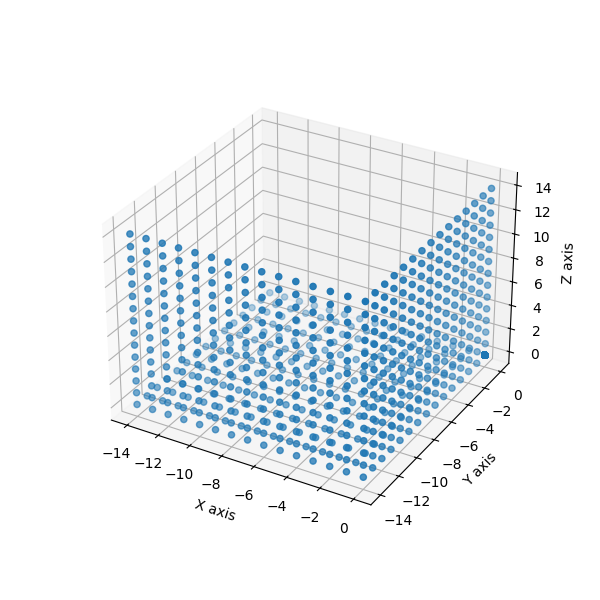

In [2]:
# Load data
data = np.load("./data/data.npy")
print('Number of points:', data.size/4)

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = plt.axes(projection='3d') 

# Name axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Plot points
ax.scatter(data[0,:], data[1,:], data[2,:]);

## **<span style="color:green"><b><i>ASSIGNMENT 1: Homogeneous transformations for the win</i></b></span>**

Now, create a new method called `apply_homogeneous_transformation()` that builds a homogeneous matrix from some *yaw*, *pitch* and *roll* values as well as a translation vector and applies it to the input data matrix `data`. *Note that we are not transforming vectors, but points, so use [`scatter()`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) instead of `quiver()`.*

Notice that opposite to the euclidean case, here both rotation and translation are applied just with one matrix multiplication! (`t` in the following code).

Recall the matrices defining the elemental rotations:

$\hspace{2cm}\mathbf{R}_z(\theta) = \begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix} \hspace{1cm} \mathbf{R}_y(\theta) = \begin{bmatrix} cos\theta & 0 & sin\theta \\ 0 & 1 & 0 \\ -sin\theta & 0 & cos\theta \end{bmatrix} \hspace{1cm} \mathbf{R}_x(\theta) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos\theta & -sin\theta \\ 0 & sin\theta & cos\theta \end{bmatrix}\\[5pt]$


In [ ]:
# ASSIGNMENT 7
def apply_homogeneous_transformation(data, yaw, pitch, roll, translation):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            data: Input set of points to transform
            yaw: Degrees to rotate the coordinate system around the 'Z' axis 
            pitch: Degrees to rotate the coordinate system around the 'Y' axis 
            roll: Degrees to rotate the coordinate system around the 'X' axis 
            translation: Column vector containing the translation for each axis
    """   
    # Write your code here!
    
    # Transform to radians
    yaw = radians(yaw)
    pitch = radians(pitch)
    roll = radians(roll)
    
    # Construct rotation matrices
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(roll), -np.sin(roll)],
                   [0, np.sin(roll), np.cos(roll)]])
    
    Ry = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                   [0, 1, 0],
                   [-np.sin(pitch), 0, np.cos(pitch)]])
    
    Rz = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                   [np.sin(yaw), np.cos(yaw), 0],
                   [0, 0, 1]])
    
    # Combine rotation matrices
    R = np.dot(Rz, np.dot(Ry, Rx))
    
    # Create homogenous transformation matrix
    t = np.zeros((4,4))
    t[0:3,0:3] = R
    t[0:3,3] = translation
    t[3,3] = 1

    data_homogeneous = np.hstack((data, np.ones((data.shape[0], 1))))
    transformed = data_homogeneous.dot(t.T)
    
    # Create figure
    fig = plt.figure()

    # Prepare figure for 3D data
    ax = plt.axes(projection='3d') 

    # Name axes
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    # Plot points
    ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2])

Now apply the following transformation to the object previously loaded:

- **Yaw** rotation: 45 degrees
- **Pitch** rotation: -60 degrees
- **Roll** rotation: 20 degrees
- **Translation**:
    - $X$-axis: 20 units 
    - $Y$-axis: 20 units
    - $Z$-axis: 40 units

Remember that this is going to be performed only using a homogeneous transformation (one unique matrix multiplication)!

In [10]:
# Load data
data = np.load("./data/data.npy")

# Apply transformation
apply_homogeneous_transformation(data, 45, -60, 20, [20,20,40])

[[  0.   0.   0. ... -14. -14.   1.]
 [  0.   0.   0. ... -14. -14.   1.]
 [  0.   1.   2. ...  13.  14.   1.]
 [  1.   1.   1. ...   1.   1.   1.]]


ValueError: shapes (4,3376) and (4,4) not aligned: 3376 (dim 1) != 4 (dim 0)

<font color='blue'>**Expected output:**  </font>

<img src="./images/example_transformation_5b.png" width="500" align="left"/>
<img src="./images/blank.png" width="100" align="rigth"/>

By doing these transformations, our graphic engine could represent moving objects in the `WORLD` when the player is still (e.g. flying birds, cars, other players, etc.). 

### Checking execution time

Just as a curiosity, let's check how much time is required by python to apply a transformation in both euclidean and homogeneous coordinates. *Note: take care with the length, if it is too large it could freeze your computer!*

In [ ]:
# Set the number of points to transform
length = 6000000 

# Prepare data in Euclidean coordinates
Pts = np.random.rand(3,length)
R = np.random.rand(3,3)
T = np.random.rand(3,1)

# Prepare data in Homogeneous coordinates
Ones = np.ones(length)
Pts_H = np.row_stack((Pts,Ones))
T_H = np.random.rand(4,4)

import time

# Apply euclidean transformation
start_time = time.time()
res = R@Pts+T
print("Time spent with Euclidean tranformation: %s seconds ---" % (time.time() - start_time))

# Apply Homogeneous transformation
start_time = time.time()
res = T_H@Pts_H
print("Time spent with Homogeneous tranformation: %s seconds ---" % (time.time() - start_time))

## **<span style="color:green"><b><i>ASSIGNMENT 2: How the player sees the world</i></b></span>**

One final example, consider the following image, in where our character Joel is looking at a dystopian, post-apocalyptic scenario. 

<img src="./images/tlou.png" width="1200" align="center"/>

The `WORLD` reference system is displayed in orange and labeled with {$\mathbf{W}$} while the reference system of the character's view is displayed in red and labeled as {$\mathbf{C}$}. We know that:

- the position and orientation of {$\mathbf{C}$} w.r.t. {$\mathbf{W}$} is given by a *yaw* angle of -45º, a *roll* angle of -90 and a translation of \[0.0,-4.0,1.2\] meters in \[$x$,$y$,$z$\] axes, respectively, and
- the coordinates of the point $\mathbf{p}^W$ in the world are \[30.0,1.0,0.5\] meters. 

**Could you compute** what are its coordinates w.r.t our character's point of view in homogeneous coordinates ($\tilde{\mathbf{p}}^C$)? In other words, we have to build the homogeneous transformation $\mathbf{T}$ that produces $\mathbf{\tilde{p}}^C = \mathbf{T}\mathbf{\tilde{p}}^W$. As we will see in future notebooks, knowing such coordinates is vital to get the position of the 3D point **in the image** that Joel would see if this game were in first-person (fortunately it's not!).

In [ ]:
# ASSIGNMENT 8
# Write your code here!
p = np.array([30,1,0.5,1])
p = np.vstack(p)

# Transform to radians
yaw = radians(None)
pitch = radians(None)
roll = radians(None)

# Construct rotation matrices
Rx = np.array(None])
Ry = np.array(None)
Rz = np.array(None)

# Combine rotation matrices
R = None

# Create homogenous transformation matrix
t = np.zeros((4,4))
t[0:3,0:3] = None
t[0:3,3] = None
t[3,3] = None

transformed = np.linalg.inv(None) @ p
print(transformed)

<font color='blue'>**Expected output (homogeneous):**  </font> 

    [[17.67766953]
     [ 0.7       ]
     [24.74873734]
     [ 1.        ]]

### <font color="blue"><b><i>Thinking about it (1)</i></b></font>

**Now you are in a good position to answer these questions:**

- What is the length of a 3D cartesian vector in homogeneous coordinates?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>
    
- How many operations do you need to transform a point from the world frame to the camera one using euclidean coordinates?  and using homogeneous coordinates?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>
    
- Explain the difference in the execution time when using the two types of transformations. 

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>
    
- Why are the rotations applied in that order? Could they have been applied differently?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

## 8.2.2 Why do we want this? Reason two

There is another reason justifying the utilization of homogeneous coordinates when dealing with transformations: they result in a natural model for the camera, since points in the image plane are projection rays in $\mathbb{R}^3$.

**In 1D:**

- Cartesian coordinates: $x=x_1=3$.
- Homogeneous coordinates: $ x = \begin{bmatrix}3 \\ 1\end{bmatrix} \equiv \begin{bmatrix}6 \\ 2\end{bmatrix} \equiv \begin{bmatrix}3k \\ k\end{bmatrix}, \ \ k \neq 0$

All the points in homogeneous coordinates represents the same point in cartesians since $x=x_1/x_2=3$.

**In 2D:**

- Cartesian coordinates: $x=\begin{bmatrix}x_1 \\ x_2\end{bmatrix} \in \mathbb{R}^2$.
- Homogeneous coordinates: $ x = k\begin{bmatrix}x_2 \\ x_1 \\ 1\end{bmatrix}, \ \ k \neq 0$

So in homogeneous coordinates, a point in the plane $\mathbb{R}^2$ transforms to a line passing through the origin in a reference frame parallel to the image plane (perpendicular to $x_3$).

The following code illustrates this for a 1D point.

In [ ]:
# 1D point
x1 = 3
plt.figure()
plt.plot(x1,0,'rx')

# Point in homogeneous
x = np.array([3,1])

# Equivalent points by multiplying by lambda
for lambda_ in np.arange(0.5,4,0.5):
    plt.plot(x[0]*lambda_,x[1]*lambda_,'bx')
    
plt.xlim(0)
plt.show()

## Conclusion

Awesome!

In his notebook we have learned:

- The principles of homogeneous coordinates.
- How to rotate and translate points or vectors using homogeneous coordinates.

Let's keep learning!